<a href="https://colab.research.google.com/github/arekangel/AI_AUTH_2025_Areklakis_Aggelos/blob/main/Ml_5h_ergasia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


2

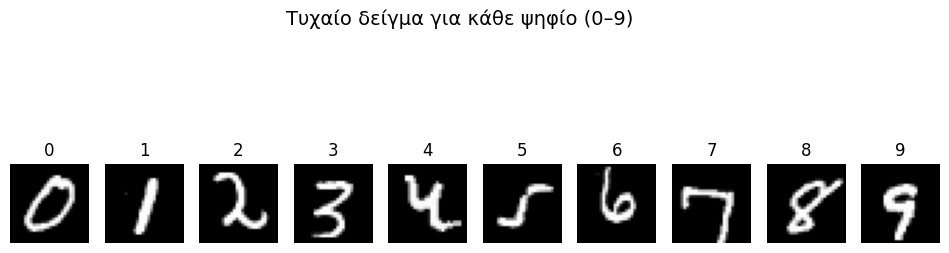

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

for digit in range(10):

    indices = np.where(y_train == digit)[0]


    random_index = np.random.choice(indices)


    plt.subplot(1, 10, digit + 1)
    plt.imshow(x_train[random_index], cmap='gray')
    plt.title(str(digit))
    plt.axis('off')

plt.suptitle("Τυχαίο δείγμα για κάθε ψηφίο (0–9)", fontsize=14)
plt.show()


3

καθε εικόνα έχει διαστάσεις 28χ28 αλλα δεν τα χρησιμοποιεί όλα για να δείξει το νούμερο που θέλουμε ουσιαστικά τα pixel που μας ενδιαφέρουν ειναι του αριθμού

4

In [ ]:


x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


print("x_train_flat:", x_train_flat.shape)
print("x_test_flat:", x_test_flat.shape)

x_train_flat: (60000, 784)
x_test_flat: (10000, 784)


5

In [ ]:
N = x_train_flat.shape[0]
k_values = [5, 15, 51, int(np.sqrt(N))]
print("Τιμές k:", k_values)

Τιμές k: [5, 15, 51, 244]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)


    y_train_pred = knn.predict(x_train_flat)
    y_test_pred = knn.predict(x_test_flat)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"k={k:>4} | Train acc={train_acc:.4f} | Test acc={test_acc:.4f}")

k=   5 | Train acc=0.9819 | Test acc=0.9688
k=  15 | Train acc=0.9710 | Test acc=0.9633
k=  51 | Train acc=0.9532 | Test acc=0.9533
k= 244 | Train acc=0.9211 | Test acc=0.9241


6

In [ ]:
x_train_norm = x_train_flat / 255.0
x_test_norm = x_test_flat / 255.0

In [ ]:
train_accuracies_norm = []
test_accuracies_norm = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_norm, y_train)

    y_train_pred = knn.predict(x_train_norm)
    y_test_pred = knn.predict(x_test_norm)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies_norm.append(train_acc)
    test_accuracies_norm.append(test_acc)

    print(f"[Normalized] k={k:>4} | Train acc={train_acc:.4f} | Test acc={test_acc:.4f}")


[Normalized] k=   5 | Train acc=0.9819 | Test acc=0.9688
[Normalized] k=  15 | Train acc=0.9710 | Test acc=0.9633
[Normalized] k=  51 | Train acc=0.9532 | Test acc=0.9533
[Normalized] k= 244 | Train acc=0.9211 | Test acc=0.9241


αφου μειωσα ομοιομορφα τις αποστάσεις αρα και ο knn δεν θα εχει διαφορετικο αποτελεσμα καθως βασίζεται στις αποστάσεις και οι αποστασεις παραμένουν ιδιες
